# GMM (Gaussian Mixture Model)

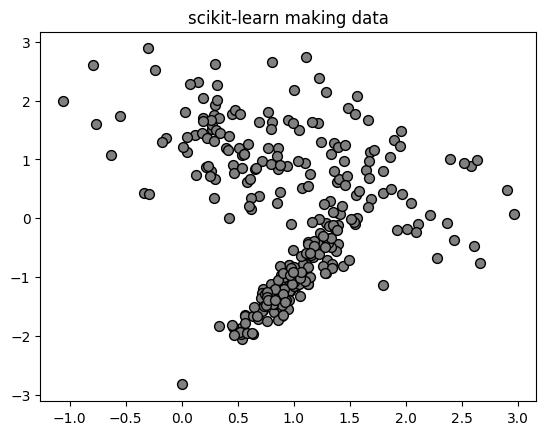

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 데이터 생성
# X,Y 데이터 둘 다 반환해주는 라이브러리인데 군집 데이터에서는  y 데이터가 필요없음
X, _ = make_classification(
    n_samples=300,          # 데이터 개수
    n_features=2,           # 특성 개수
    n_informative=2,        # 유의미한 특성 개수
    n_redundant=0,          # 중복 특성 개수
    n_clusters_per_class=1, # 클래스 당 클러스터 개수
    random_state=42
)

# 생성 데이터 시각화
plt.scatter(X[:,0],X[:,1], s=50, c='gray', marker='o', edgecolors='k')
plt.title('scikit-learn making data')
plt.show()

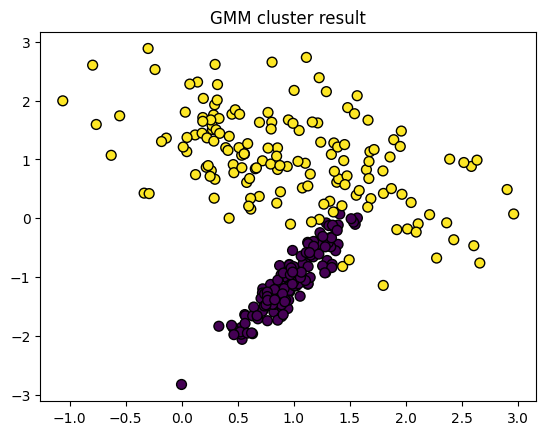

In [ ]:
# GMM 적용 및 군집화 결과 시각화 - 라벨로 구분
# 가중치를 가우시안 형태로 그리는건데 데이터가 각 클러스터에 포함될 확률 중 확률이 가장 높은 것으로 반영이 됨
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, s=50, edgecolors='k') # label에 따라 다른 색이 나오도록 c에 labels 설정
plt.title('GMM cluster result')
plt.show()

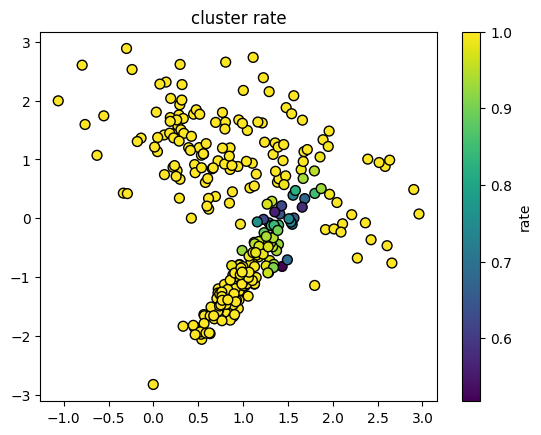

In [ ]:
# 군집 포함 확률 시각화 - 확률값이 높을수록 노란색, 낮을수록 보라색
# 위에는 라벨로 구분해서 노랑, 보라 이분법적으로 구분됐다면 이 산점도는 확률값으로 구분한거임
# 보라색이 될수록 rate가 적어지는데 이 뜻은 경계쪽에 위치하거나 여러 클러스터에 속해있거나 하기 때문임
probs = gmm.predict_proba(X)

plt.scatter(X[:,0], X[:,1], c=probs.max(axis=1), s=50, edgecolors='k')
plt.title('cluster rate')
plt.colorbar(label='rate')
plt.show()